In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 4000)
path = 'C:\\Users\{}\Downloads\\input.xlsx'
input = pd.read_excel(path) 
del input['Unnamed: 0']
#calcolo grafo direzionato
input_for_dg = []
for i in range(input.shape[0]):
  input_for_dg.append(tuple(input.loc[i].values.tolist()))
import networkx as nx
DG = nx.DiGraph()
DG.add_weighted_edges_from(input_for_dg)
sp = nx.shortest_path(DG, source=1826657058, target=1826645935)  #Source: Horton, Target: London
lenght = nx.shortest_path_length(DG,source=1826657058, target=1826645935)

#lista 'A', 'Z' dello shortest path di networkX
def a_z(sp):
  a = []
  z = []
  for i in range(1, len(sp)):
    a.append(sp[i-1])
    z.append(sp[i])
  return a, z

# calcolo tempo minimo date le liste 'A', 'Z' ottenute dallo shortest path di networkX
def min_time(a, z, dataframe):
  '''dato in input il dataframe A-Z, liste A-Z, fornisce il tempo minimo'''
  c = 0
  for n, m in zip(a,z):
    c+=dataframe.loc[(dataframe['A']==n) & (dataframe['Z']==m)]['W'].tolist()[0]
  return print('Giorni impiegati: ', int(round(c/24, 0)))
a, z = a_z(sp)
min_time(a,z, input)

Giorni impiegati:  28


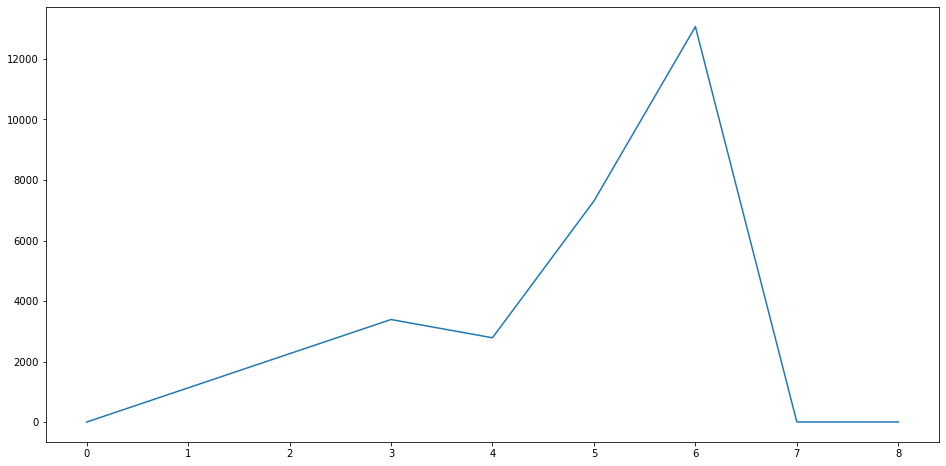

In [5]:
#distribuzione dei gradi dei nodi del grafo
import matplotlib.pyplot as plt
degree=[]
for n in DG.nodes():
    degree.append(DG.out_degree(n))
deg = pd.DataFrame(degree, columns=['gradi'])
deg['gradi2'] = deg['gradi']
raggruppamento = deg.groupby(['gradi']).count()
fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=1)
ax.plot(raggruppamento)
plt.show()

Mappa

In [2]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

"apt-get" non Š riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.
"apt-get" non Š riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\michele.lenato\Anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\michele.lenato\\AppData\\Local\\Temp\\pip-req-build-cc9jjjhc\\setup.py'"'"'; __file__='"'"'C:\\Users\\michele.lenato\\AppData\\Local\\Temp\\pip-req-build-cc9jjjhc\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\michele.lenato\AppData\Local\Temp\pip-pip-egg-info-pwv2rk0a'
         cwd: C:\Users\michele.lenato\AppData\Local\Temp\pip-req-build-cc9jjjhc\
    Complete output (18 lines):
    checking for GEOS lib in C:\Users\michele.lenato ....
    checking for GEOS lib in C:\Users\michele.lenato\local ....
    checking for GEOS lib in /usr ....
    checking for GEOS lib in /usr/local ....
    checking for GEOS lib in /sw ....
    checking for GEOS lib in /opt

In [ ]:
# lon, lat per grafo su Basemap
lon_tot = []
lat_tot = []
for n in sp:
  lon_tot.append(df[df['id']==n]['lng'].values[0])
  lat_tot.append(df[df['id']==n]['lat'].values[0])

from mpl_toolkits.basemap import Basemap as Basemap
plt.figure(figsize=(60,30))
m = Basemap(
        projection='merc',
        llcrnrlon=-179.5900,
        llcrnrlat=-54.9341,
        urcrnrlon=179.3667,
        urcrnrlat=81.7166,
        lat_ts=40,
        resolution='i',
        suppress_ticks=True)

lat = lat_tot
lon = lon_tot

x, y = m(lon, lat)
m.plot(x, y, 'o-', markersize=2, linewidth=2, color='red') 

m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.bluemarble()
plt.show() 